In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
file = '/home/ck/DIR/cornkle/data/NFLICS/cell_stats14.2_n18_15.2_n16_Unique_msg9_cell_mean_cellthresh_n70_cellpixlt_n70_freq_mean_00000_refhours_18_21.csv' 

In [5]:
tab = pd.read_table(file, parse_dates=True, delimiter=',')

In [6]:
test= tab[tab.time==tab.time[0]]
test.com_lon.values

array([26.])

In [7]:
tab

,time,com_lon,com_lat,cell_min_T,cell_mean_T,cell_area_km2
0,2004-08-07 20:00:00,26.0,235.0,-83.0,-74.0,8067.97
1,2005-08-19 18:00:00,19.0,232.0,-79.0,-74.0,18732.42
2,2005-08-29 20:00:00,11.0,240.0,-84.0,-74.0,16755.44
3,2006-07-24 19:00:00,28.0,224.0,-86.0,-76.0,6564.46
4,2006-07-26 18:00:00,13.0,253.0,-84.0,-75.0,12379.89
5,2006-08-12 18:00:00,21.0,252.0,-80.0,-74.0,10431.65
6,2006-09-07 18:00:00,28.0,224.0,-78.0,-74.0,8965.96
7,2007-07-17 18:00:00,24.0,244.0,-87.0,-76.0,9453.58
8,2007-07-25 18:00:00,30.0,234.0,-83.0,-74.0,13388.85
9,2007-08-02 21:00:00,28.0,237.0,-80.0,-74.0,13366.93


In [8]:
pd.to_datetime(tab.time.values[0]).month

8

In [9]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [10]:
cnst.AMSRE_DAY + 'AMSR_' + fdate + '.nc'

NameError: name 'fdate' is not defined

In [46]:
kernel2_list = []
kernel3_list = []
cnt_list = []


for date in tab.time:
    
    
    single = tab[tab.time==date]
    
    dt = pd.to_datetime(date)
    fdate = str(dt.year) + str(dt.month).zfill(2) + str(dt.day).zfill(2)
    
    try:

        lsta = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + fdate + '.nc') #sma  #'AMSR_L3_LPRMv05_A_'

    except:
        try:
            lsta = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'smaD_' + fdate + '.nc')
            print('AMSR night')
        except:
            continue
            
    testbox = lsta['SM'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values

    if np.isnan(testbox).all():
        try:
            lsta = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'smaD_' + fdate + '.nc') 
            print('AMSR night')
        except:
            print('AMSR night fail')
            continue
            
        testbox = lsta['SM'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values
        print('AMSR night')
        if np.isnan(testbox).all():
            print('AMSR night fail')
            continue
  
    lsta = lsta.sel(lon=slice(-19, -7), lat=slice(9, 25))    
    lsta = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day))



    lsta_da = lsta['SM'].squeeze()
#     booleans = np.zeros_like(lsta_da.values) * np.nan
#     booleans[lsta_da.values>4] = 1
#     booleans[lsta_da.values<-4] = -1
    
    #lsta_da.values = booleans
    
    
#     point = lsta_da.sel(lat=single.com_lat.values, lon=single.com_lon.values, method='nearest')
#     if np.isnan(point.values):
#         continue


    
    print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
    dt.day).zfill(2) + '.nc')
#     plat = point['lat'].values
#     plon = point['lon'].values

#     xpos = np.where(lsta_da['lon'].values == plon)
#     xpos = int(xpos[0])
#     ypos = np.where(lsta_da['lat'].values == plat)
#     ypos = int(ypos[0])
    
    
#     try:
#         rkernel2, rkernel3, rcnt = cut_kernel(xpos, ypos, lsta_da, dt, plon, plat)
#     except TypeError:
#         continue

    cnt = np.zeros_like(lsta_da.values)
    cnt[np.isfinite(lsta_da.values)] = 1

    kernel2_list.append(lsta_da.values)
    kernel3_list.append(lsta_da.values- np.nanmean(lsta_da.values))
    cnt_list.append(cnt) 
    
    lat = lsta.lat.values
    lon = lsta.lon.values

Doing AMSR_20060724.nc
Doing AMSR_20060726.nc
Doing AMSR_20060812.nc
AMSR night
AMSR night
AMSR night fail
AMSR night
AMSR night
AMSR night fail
Doing AMSR_20070725.nc
AMSR night
AMSR night
AMSR night fail
Doing AMSR_20070823.nc
Doing AMSR_20070906.nc
AMSR night
AMSR night
AMSR night fail
AMSR night
AMSR night
AMSR night fail
Doing AMSR_20080729.nc
Doing AMSR_20080807.nc
Doing AMSR_20080809.nc
Doing AMSR_20090808.nc
Doing AMSR_20090824.nc
Doing AMSR_20090828.nc
Doing AMSR_20100831.nc


In [47]:
kernel2_sum = np.nansum(np.stack(kernel2_list, axis=0), axis=0)
kernel3_sum = np.nansum(np.stack(kernel3_list, axis=0), axis=0)
cnt_sum = np.nansum(np.stack(cnt_list, axis=0), axis=0)

In [48]:
dic = {'ano' : kernel2_sum, 'regional' : kernel3_sum, 'cnt' : cnt_sum}

In [49]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(8,6), dpi=300)
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon-0.4, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=np.linspace(-3,3,8), extend='both')
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title('')
    cbar = plt.colorbar()
    cbar.set_label('Volumetric soil moisture anomaly (%)')
    f.canvas.draw()
    plt.tight_layout()
    
    plt.savefig(cnst.network_data + 'figs/NFLICS/NFLICS_SManomaly_dakarstorms.png')
    #plt.show()

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


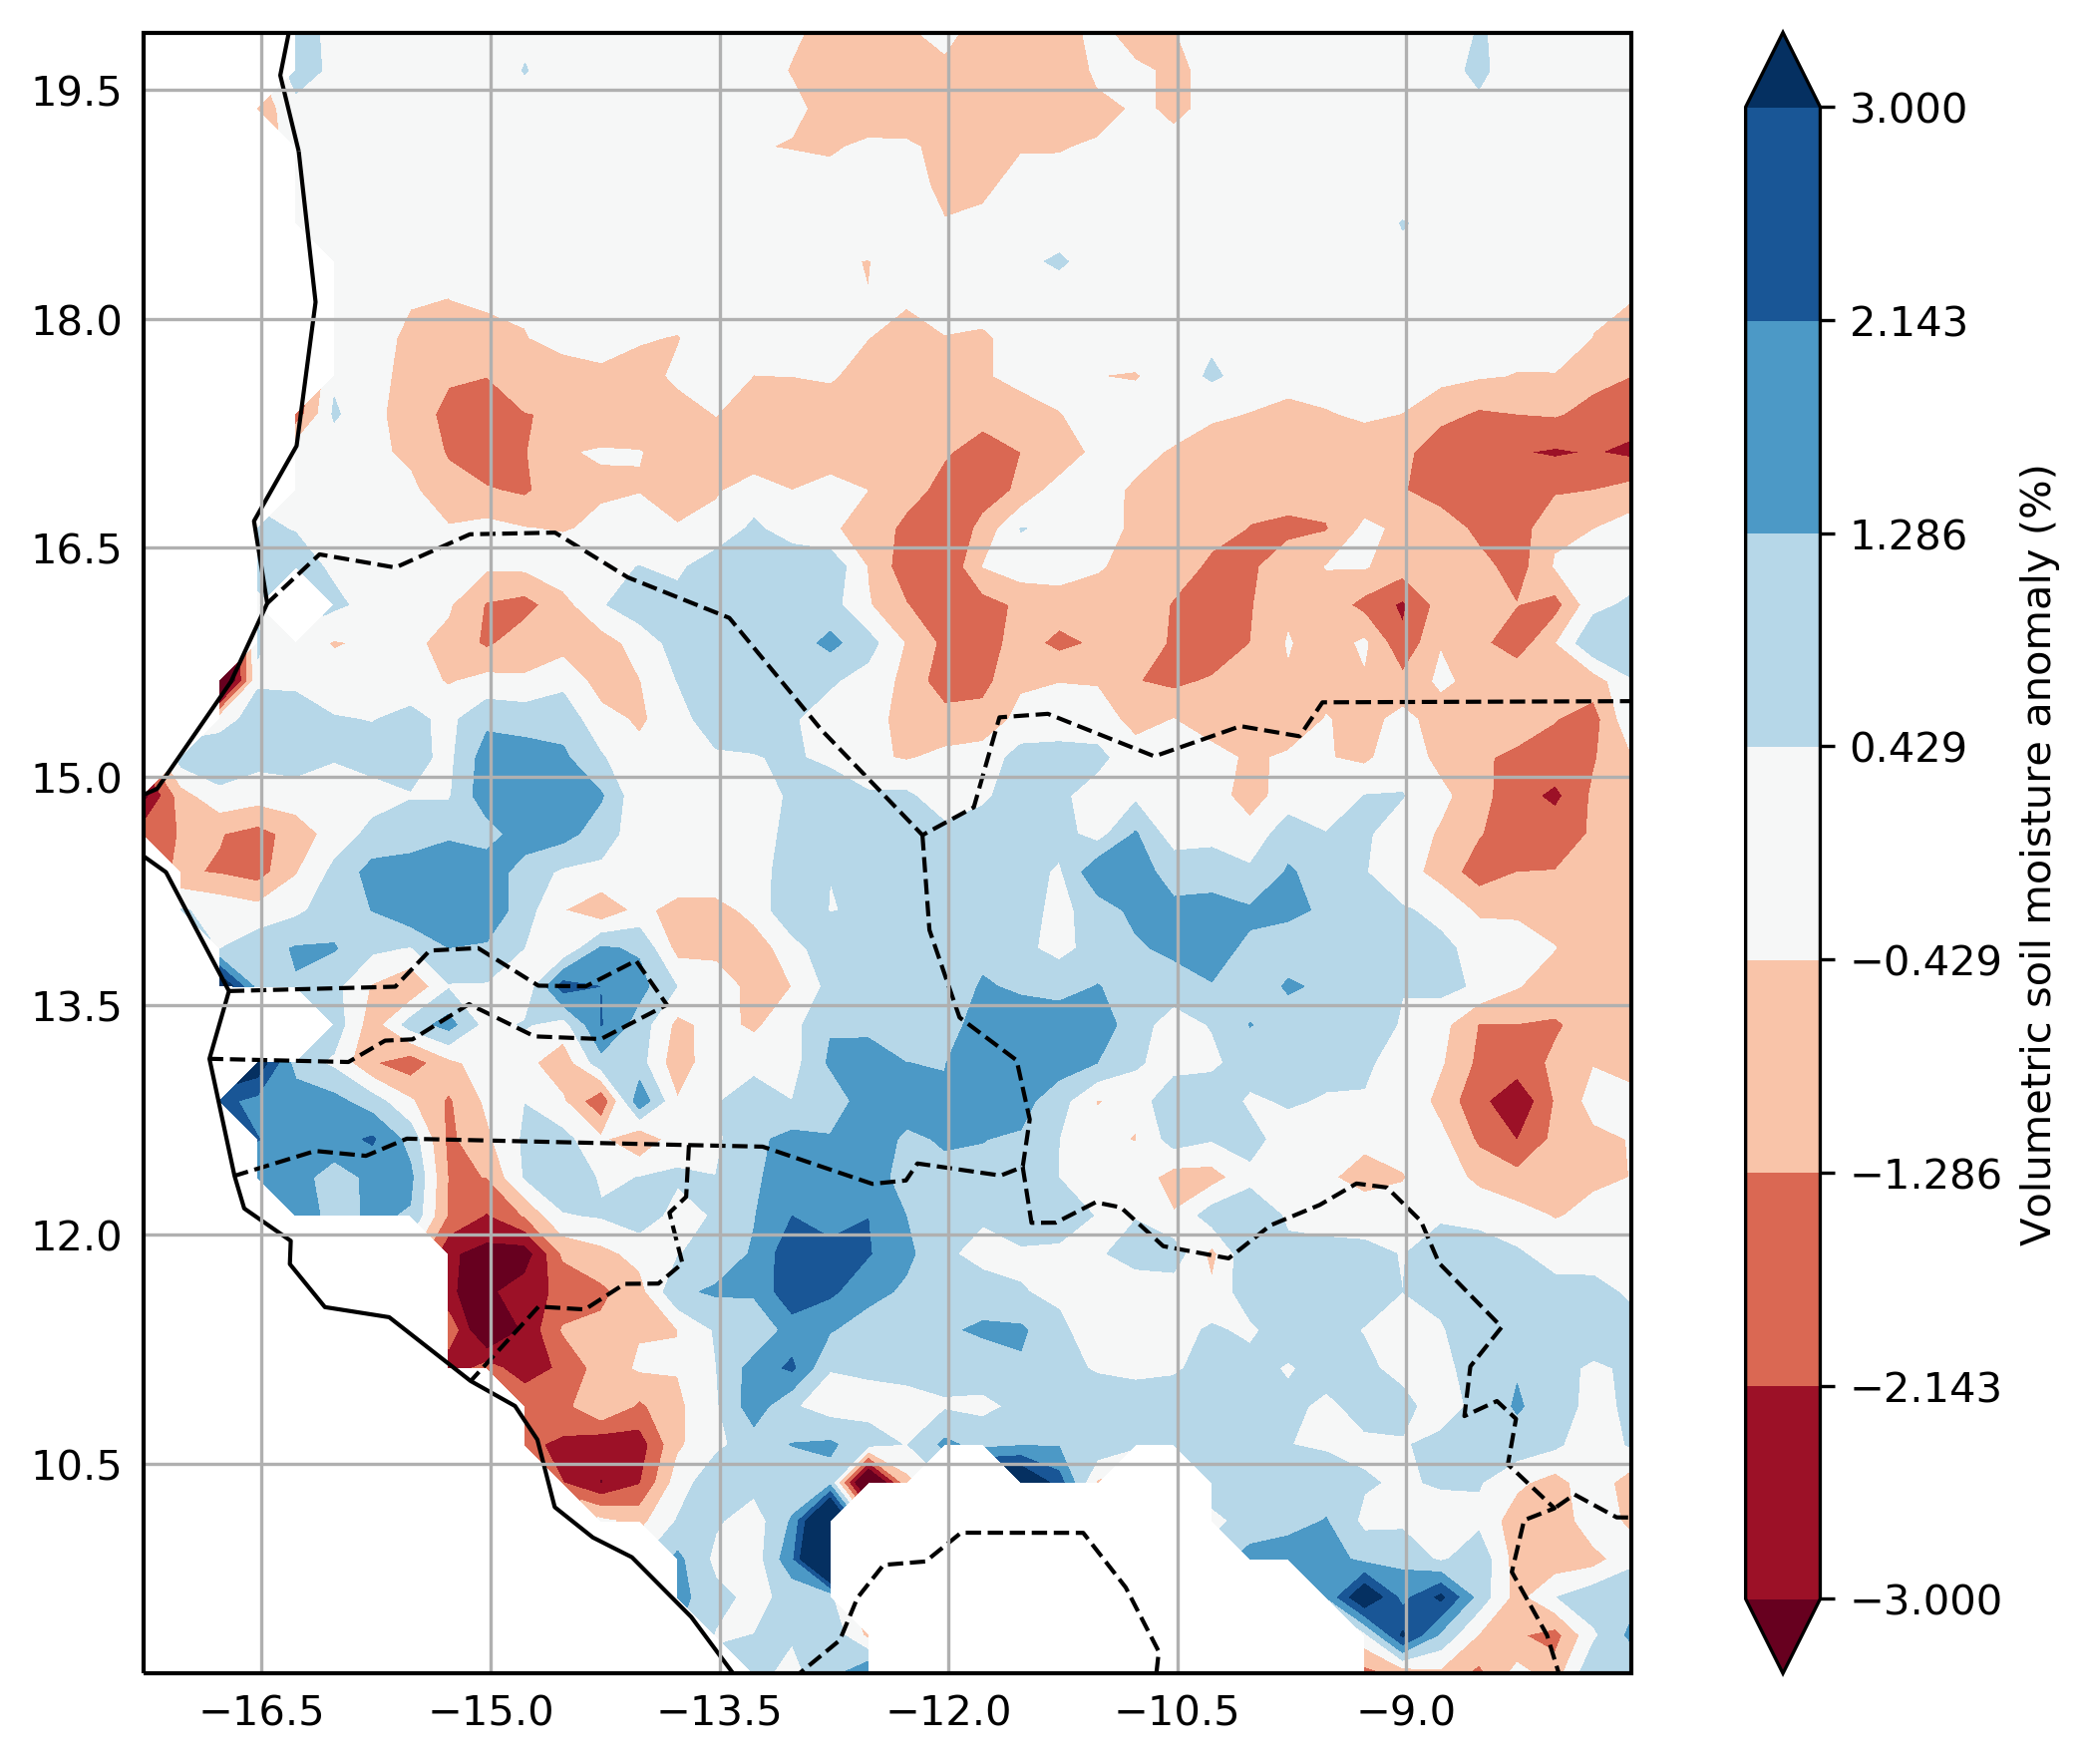

In [50]:
draw_map(kernel2_sum/cnt_sum, lat, lon)

In [41]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(8,6), dpi=300)
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon-0.4, lat, t, transform=ccrs.PlateCarree(), cmap='viridis', extend='both', levels=np.arange(0,13))
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title('')
    cbar = plt.colorbar()
    cbar.set_label('Valid storm cases')
    f.canvas.draw()
    plt.tight_layout()
    
    plt.savefig(cnst.network_data + 'figs/NFLICS/valid_cases.png')
    #plt.show()

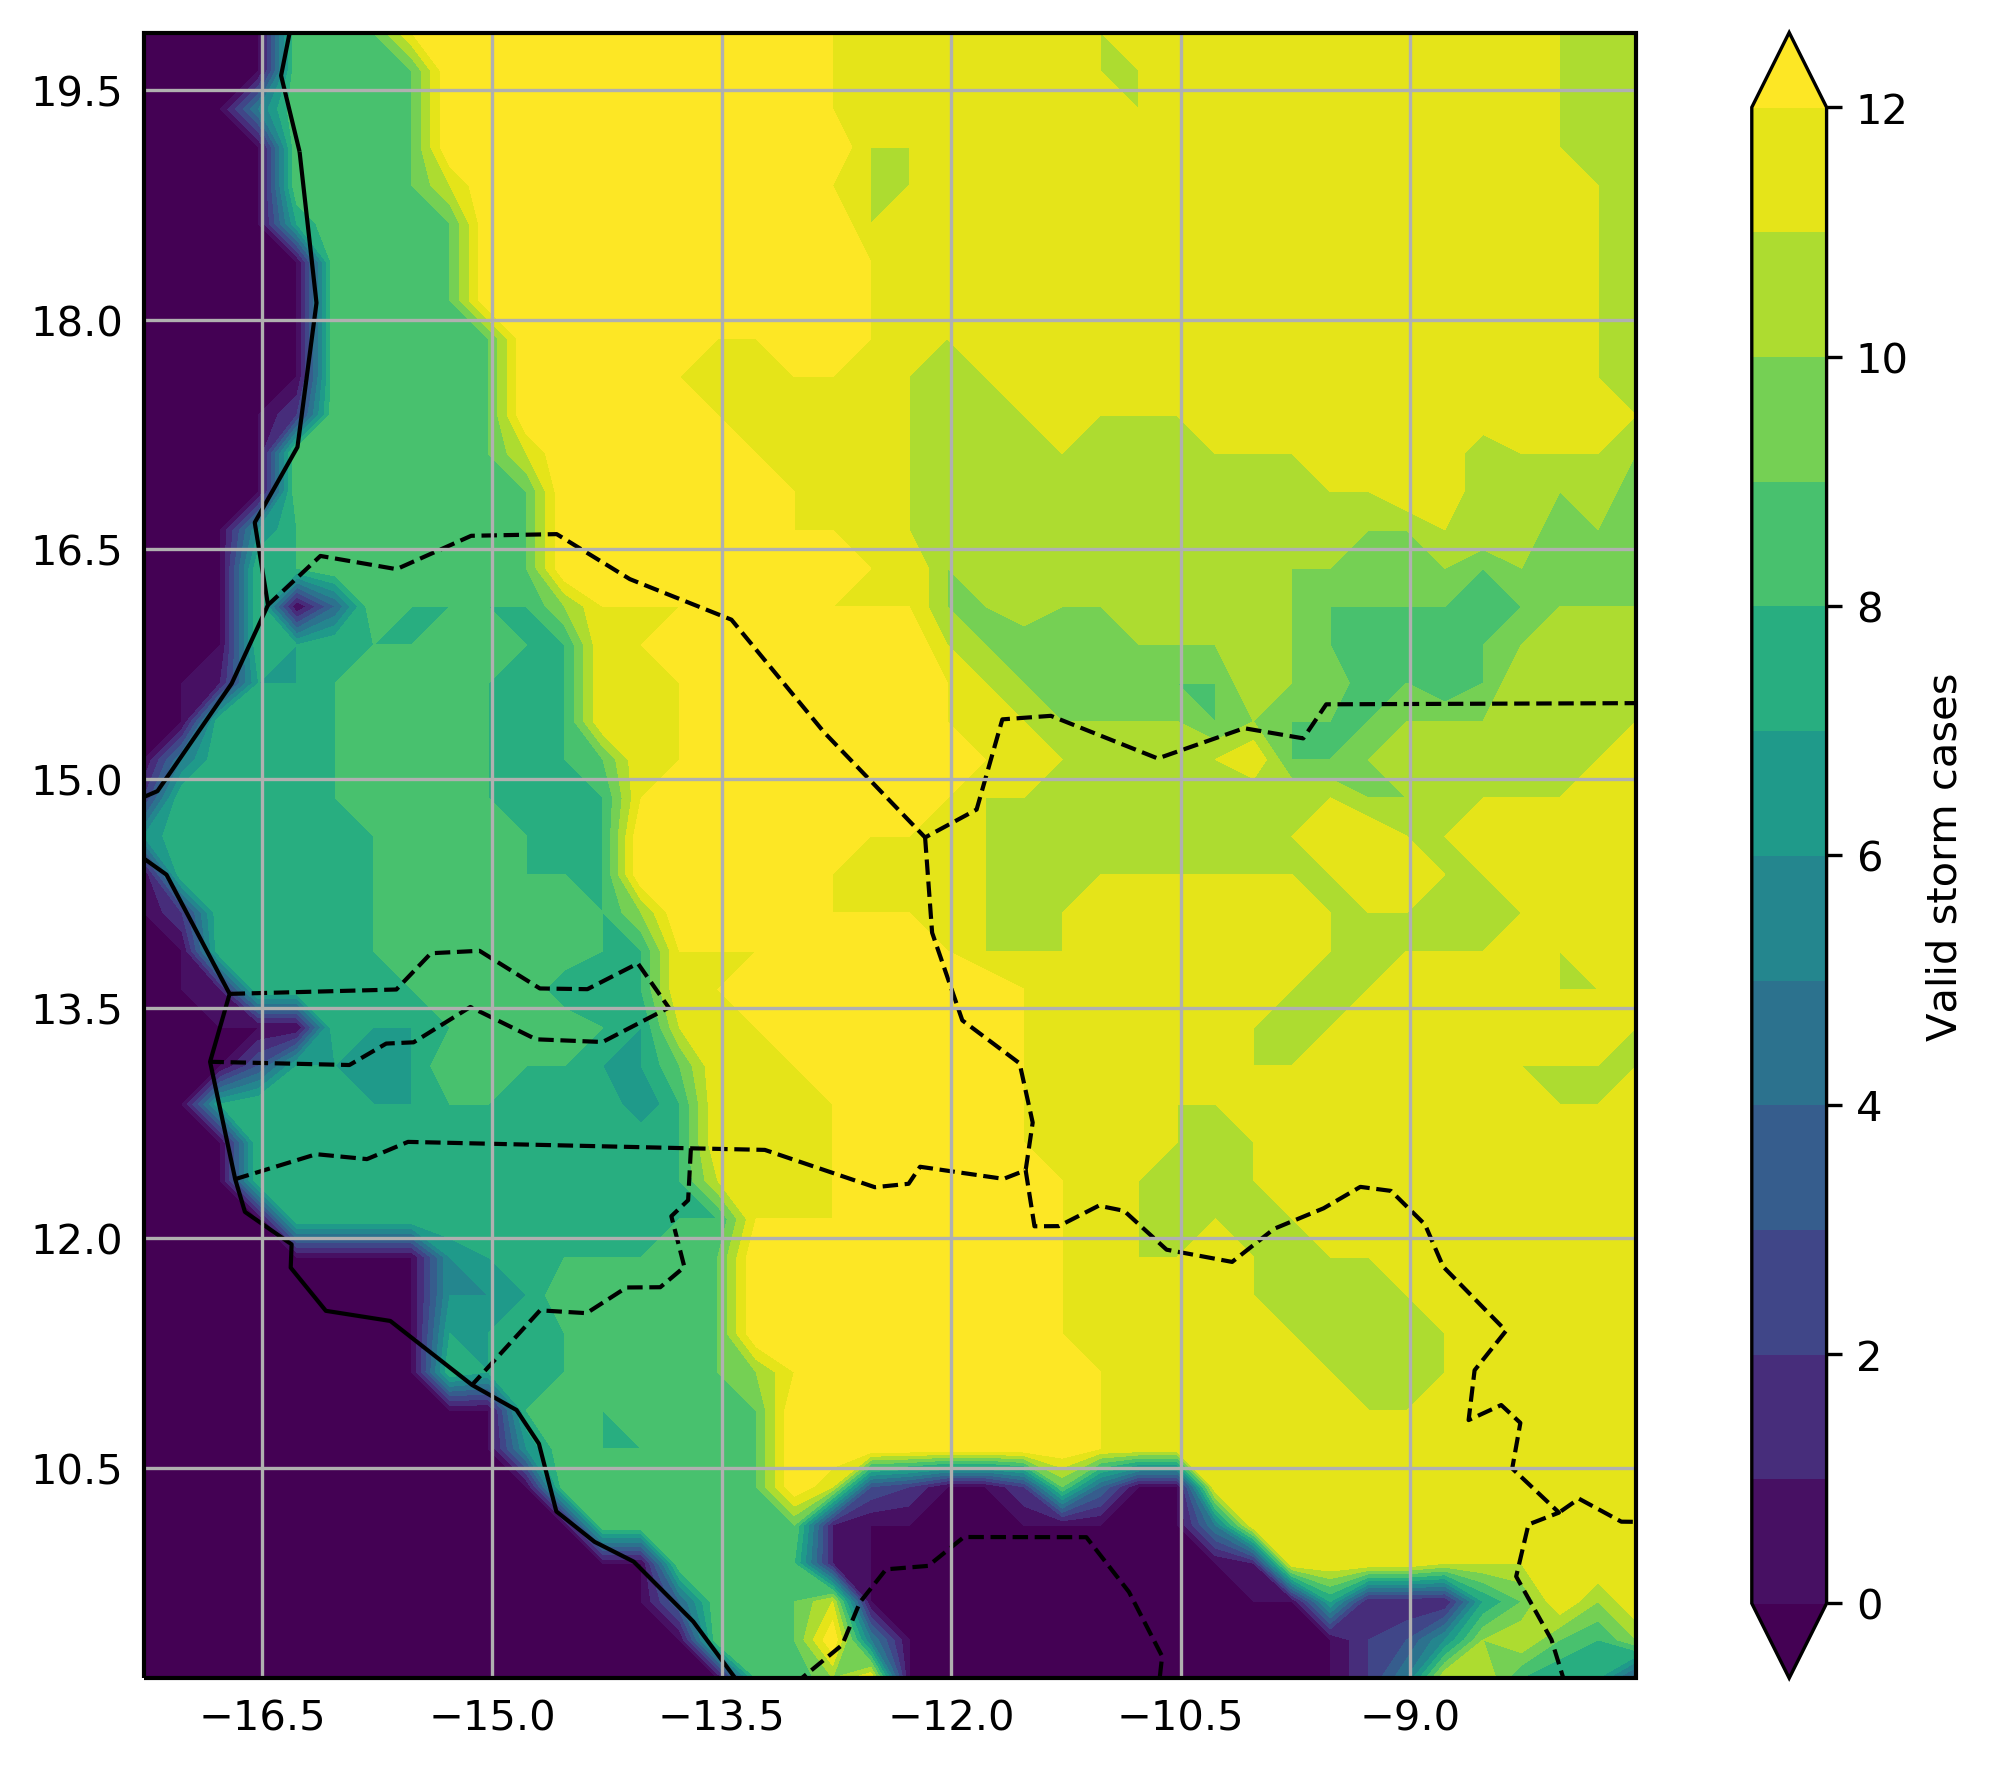

In [42]:
draw_map(cnt_sum, lat, lon)